In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pickle

In [9]:
pickle_in = open("gdf_gb_ter.pickle","rb")
gdf_gb_ter = pickle.load(pickle_in)

In [11]:
gdf_gb_ter.head()

,geometry,id,PickupCell,day_of_week,minute_of_day,avg(td),avg(te),avg(ter)
0,POLYGON ((-74.01872951254884 40.70458412702708...,26:79,26:79,6,16:50:00,239.0,9.46,0.039582
1,POLYGON ((-73.91416841969826 40.74571778553069...,38:60,38:60,0,00:16:00,190.0,6.30,0.033158
2,POLYGON ((-73.91416841969826 40.74571778553069...,38:60,38:60,0,01:21:00,780.0,15.82,0.020282
3,POLYGON ((-73.91416841969826 40.74571778553069...,38:60,38:60,0,06:21:00,826.0,16.80,0.020339
4,POLYGON ((-73.91416841969826 40.74571778553069...,38:60,38:60,0,15:36:00,357.0,7.80,0.021849


###  Simulation
* origin cell id: "23:60"
* time: 8:00 am
* day: Monday

In [12]:
pickle_in = open("graph.pickle","rb")
graph = pickle.load(pickle_in)

In [13]:
from dijkstar import find_path

In [14]:
cost_func = lambda u, v, e, prev_e: e['cost']

In [15]:
pickle_in = open("cell_list.pickle","rb")
cells = pickle.load(pickle_in)

In [16]:
origin_cell = (23, 60)
dd = [find_path(graph, origin_cell, cell, cost_func=cost_func).total_cost for cell in cells]

In [17]:
cells = pd.read_csv('cells.csv')

In [22]:
cells['driving_duration'] = dd

In [24]:
gdf = gdf_gb_ter.merge(cells, left_on = "id", right_on = "id")

In [36]:
# origin cell id: "23:60"
# time: 08:00:00
# day: Monday

for d in [0, 5]:
    for m in ['08:00:00', "23:00:00"]:
        gdf_sim = gdf[(gdf['day_of_week'] == day_of_week) & (gdf['minute_of_day'] == minute_of_day)]

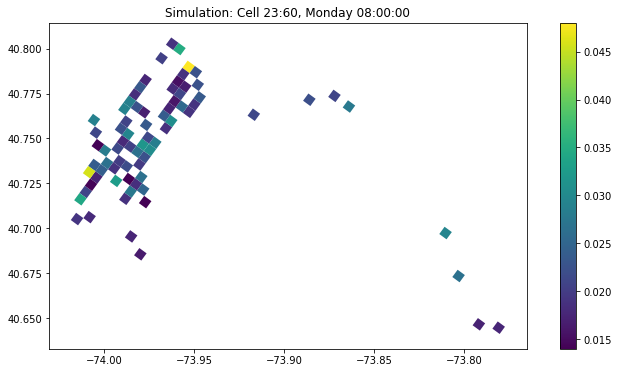

In [66]:
gdf_sim.plot(column = "avg(ter)", legend=True, figsize=(12,6))
plt.title("Simulation: Cell 23:60, Monday 08:00:00")
plt.savefig("gdf_sim.png")